In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
# check the original e(b-v)... How is it possible that for IDENTICAL objects, the E(B-V) for IN2P3 
# is not IDENTICAL to that in NCSA ? 
dir_info_files = '/astro/store/scratch/tmp/suberlak/S13Agg/repo_fls/'

ebv_ncsa = pd.read_table(dir_info_files+'ebv_NCSA_lt235.dat.gz', delimiter=' ', usecols=[0,1])
ebv_ncsa.columns = ['objectId','ebv']
ebv_intpt = pd.read_table(dir_info_files+ 'ebv_IN2P3_lt230.dat.gz', delimiter=' ', usecols=[0,1])
ebv_intpt.columns = ['objectId','ebv'] 

In [4]:
# How many objects overlap between IN2P3 and NCSA 
np.sum(np.in1d(ebv_intpt['objectId'].values, ebv_ncsa['objectId'].values))

332239

In [5]:
# Select duplicates 
mask_duplicates_intpt = np.in1d(ebv_intpt['objectId'].values, ebv_ncsa['objectId'].values)
intpt_duplicates =  ebv_intpt[mask_duplicates_intpt]

mask_duplicates_ncsa = np.in1d(ebv_ncsa['objectId'].values, ebv_intpt['objectId'].values)
ncsa_duplicates = ebv_ncsa[mask_duplicates_ncsa]

In [6]:
ebv_dups_merged = pd.merge(intpt_duplicates, ncsa_duplicates, on='objectId',suffixes=('_ncsa','_intpt'))

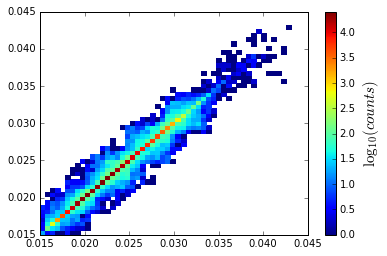

In [11]:
%matplotlib inline 
fig,ax = plt.subplots()

x = ebv_dups_merged['ebv_intpt'].values
mask_x = x < 160
y = ebv_dups_merged['ebv_ncsa'].values
mask_y = y < 160

mask_xy = mask_x * mask_y 

H, xedges, yedges = np.histogram2d(x[mask_xy], y[mask_xy], bins=50)
H = np.rot90(H)
H = np.flipud(H)
# Mask zeros
Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zeropltssssss
# Plot 2D histogram using pcolor
cmap = ax.pcolormesh(xedges,yedges,np.log10(Hmasked), cmap='jet')
ax.set_xlabel()
ax
cbar = plt.colorbar(cmap)
cbar.set_label(r'$\log_{10}(counts)$', fontsize=15)